<a href="https://colab.research.google.com/github/Urnisha2002/Codeclause_Internship/blob/main/Stock_Market_Prediction%5CSTOCK_MARKET_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK 1 - STOCK MARKET PREDICTION(CODECLAUSE)**

##**BY - URNISHA SARKAR**

#**STOCK MARKET PREDICTION**

##**INTRODUCTION**

The Stock Market Prediction Project aims to forecast future stock prices using
machine learning techniques. This documentation provides a comprehensive
overview of the project's objectives, methodologies, data sources, and key findings. It serves as a guide for understanding the process and results of predicting stock market trends and can be a valuable resource for investors and analysts.





##**SCOPE**

This document encompasses the entire project lifecycle, including data collection, preprocessing, model selection, evaluation, and interpretation of stock market predictions, offering insights for informed investment decisions.

##**AUDIENCE**


This document is tailored for investors, financial analysts, data scientists, and anyone interested in stock market prediction methodologies and results.

##**PROBLEM STATEMENT**

The problem addressed by this project is the accurate prediction of future stock prices using machine learning. It aims to develop models that can analyze historical market data to forecast stock trends, helping investors make informed decisions and mitigate risks in the volatile stock market.

##**OBJECTIVES**


The primary objective of this project is to employ machine learning techniques to create robust and accurate models for predicting stock market trends, aiding investors in making informed financial choices.

###**DATA COLLECTION**

Datasets used are collected from Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
data=files.upload()

Saving abe.us.txt to abe.us.txt


In [4]:
df=pd.read_csv('abe.us.txt')

###**DATA PRE-PROCESSING AND DATA VISUALISATION**

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


In [6]:
df.shape

(3190, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.0
mean,11.599416,11.712848,11.484610,11.605599,28444.870846,0.0
std,2.350376,2.365621,2.327065,2.341989,37525.175821,0.0
min,5.860300,5.905000,5.834700,5.841100,106.000000,0.0
25%,10.534000,10.655000,10.413750,10.554000,8147.750000,0.0
50%,11.981000,12.067000,11.899000,11.988500,17741.500000,0.0
75%,13.271000,13.386750,13.189000,13.295750,36167.250000,0.0
max,18.130000,19.151000,17.842000,17.925000,634041.000000,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3190 non-null   object 
 1   Open     3190 non-null   float64
 2   High     3190 non-null   float64
 3   Low      3190 non-null   float64
 4   Close    3190 non-null   float64
 5   Volume   3190 non-null   int64  
 6   OpenInt  3190 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 174.6+ KB


In [9]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [10]:
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


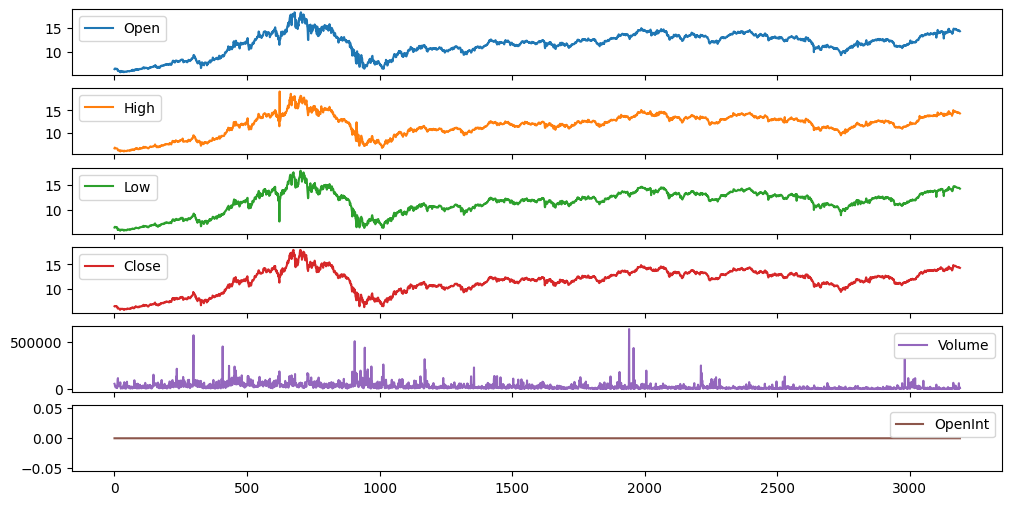

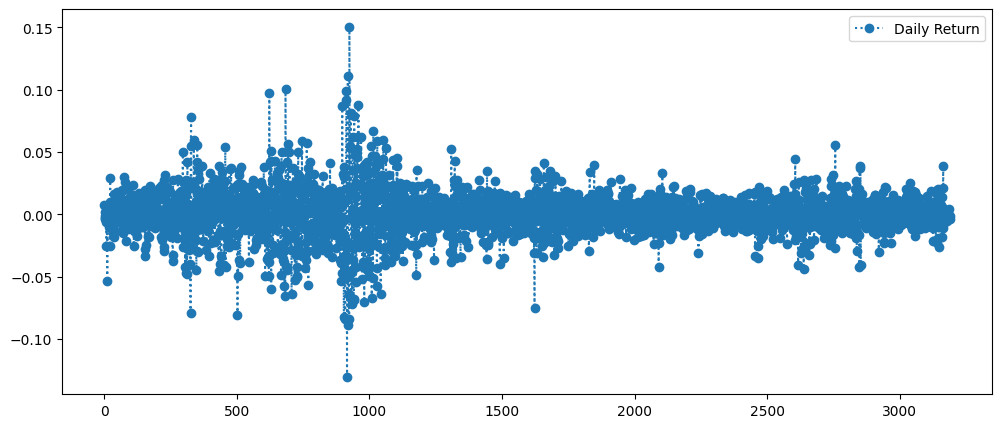

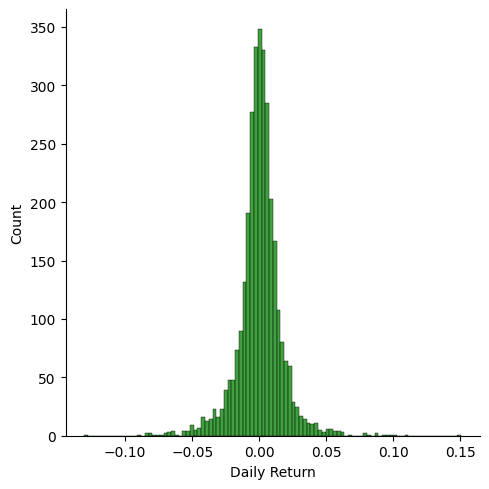

            Date     Open     High      Low    Close  Volume  OpenInt  \
0     2005-02-25   6.4987   6.6009   6.4668   6.5753   55766        0   
1     2005-02-28   6.6072   6.7669   6.5944   6.6263   49343        0   
2     2005-03-01   6.6391   6.6773   6.6072   6.6072   31643        0   
3     2005-03-02   6.5753   6.6072   6.5434   6.5816   27101        0   
4     2005-03-03   6.5753   6.6135   6.5562   6.5944   17387        0   
...          ...      ...      ...      ...      ...     ...      ...   
3185  2017-11-06  14.3998  14.4802  14.3900  14.4400   62423        0   
3186  2017-11-07  14.4400  14.4400  14.4000  14.4000    6722        0   
3187  2017-11-08  14.3400  14.4352  14.3400  14.3781    6304        0   
3188  2017-11-09  14.3300  14.3737  14.2800  14.3200   18761        0   
3189  2017-11-10  14.2500  14.3000  14.2400  14.3000   10658        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0           11.60878       11.625272        11.649354

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
OpenInt            0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

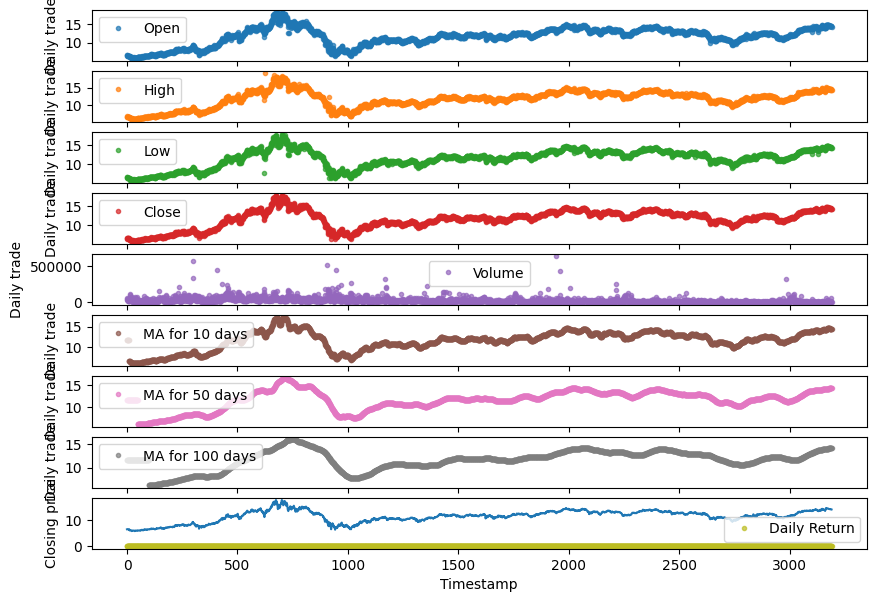

In [11]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()


df.shape
df.size
df.describe(include='all').T
df.dtypes
df.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

df['Daily Return'] = df['Close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(df['Date'])
closing_df1 = pd.DataFrame(df['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

df.nunique()

df.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = df[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(10, 7), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df1 = df
print(df1)

df.isnull().sum()

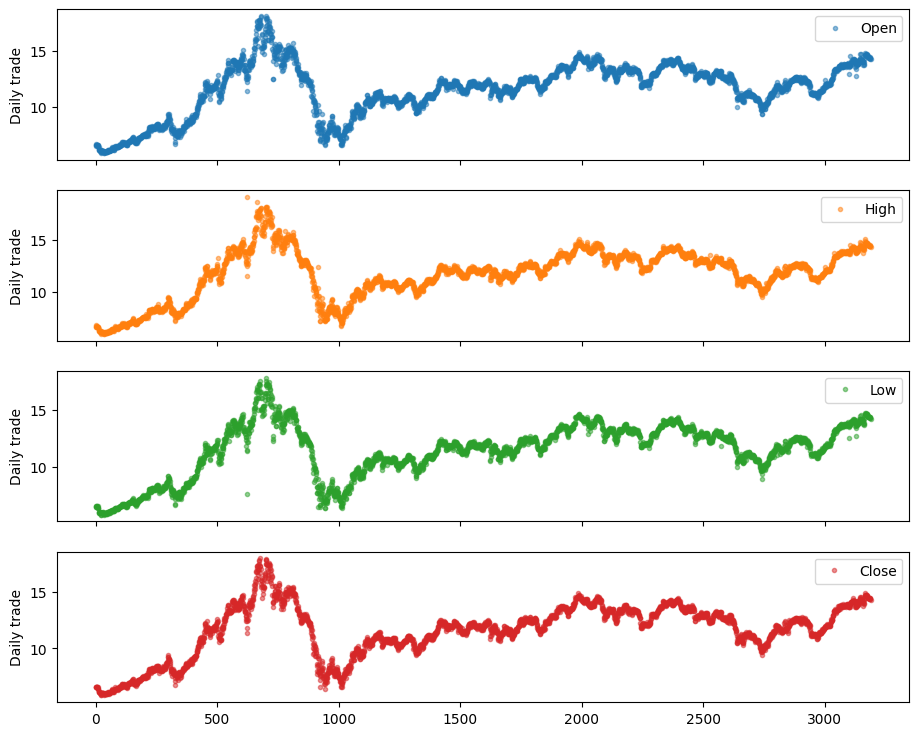

In [12]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date     Open     High      Low    Close  Volume  OpenInt  \
0     2005-02-25   6.4987   6.6009   6.4668   6.5753   55766        0   
1     2005-02-28   6.6072   6.7669   6.5944   6.6263   49343        0   
2     2005-03-01   6.6391   6.6773   6.6072   6.6072   31643        0   
3     2005-03-02   6.5753   6.6072   6.5434   6.5816   27101        0   
4     2005-03-03   6.5753   6.6135   6.5562   6.5944   17387        0   
...          ...      ...      ...      ...      ...     ...      ...   
3185  2017-11-06  14.3998  14.4802  14.3900  14.4400   62423        0   
3186  2017-11-07  14.4400  14.4400  14.4000  14.4000    6722        0   
3187  2017-11-08  14.3400  14.4352  14.3400  14.3781    6304        0   
3188  2017-11-09  14.3300  14.3737  14.2800  14.3200   18761        0   
3189  2017-11-10  14.2500  14.3000  14.2400  14.3000   10658        0   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0           11.60878       11.625272        11.649354

,count,mean,std,min,25%,50%,75%,max
Open,3190.0,11.599416,2.350376,5.860300,10.534000,11.981000,13.271000,18.130000
High,3190.0,11.712848,2.365621,5.905000,10.655000,12.067000,13.386750,19.151000
Low,3190.0,11.484610,2.327065,5.834700,10.413750,11.899000,13.189000,17.842000
Close,3190.0,11.605599,2.341989,5.841100,10.554000,11.988500,13.295750,17.925000
Volume,3190.0,28444.870846,37525.175821,106.000000,8147.750000,17741.500000,36167.250000,634041.000000
OpenInt,3190.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MA for 10 days,3190.0,11.608780,2.321162,5.963080,10.577125,11.962700,13.297200,17.329400
MA for 50 days,3190.0,11.625272,2.231059,6.037646,10.591696,11.933450,13.269480,16.618460
MA for 100 days,3190.0,11.649354,2.113346,6.221377,10.632551,11.876775,13.200810,16.042560
Daily Return,3190.0,0.000388,0.017010,-0.130345,-0.006439,0.000484,0.007807,0.150503


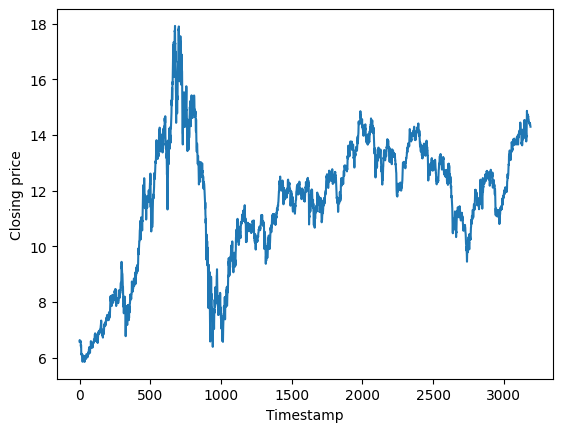

In [13]:
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df1 = df
print(df1)

df1.describe().transpose()

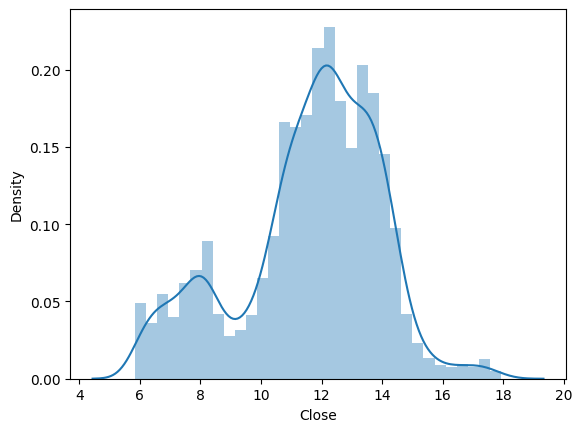

In [14]:
sns_plot = sns.distplot(df['Close'])

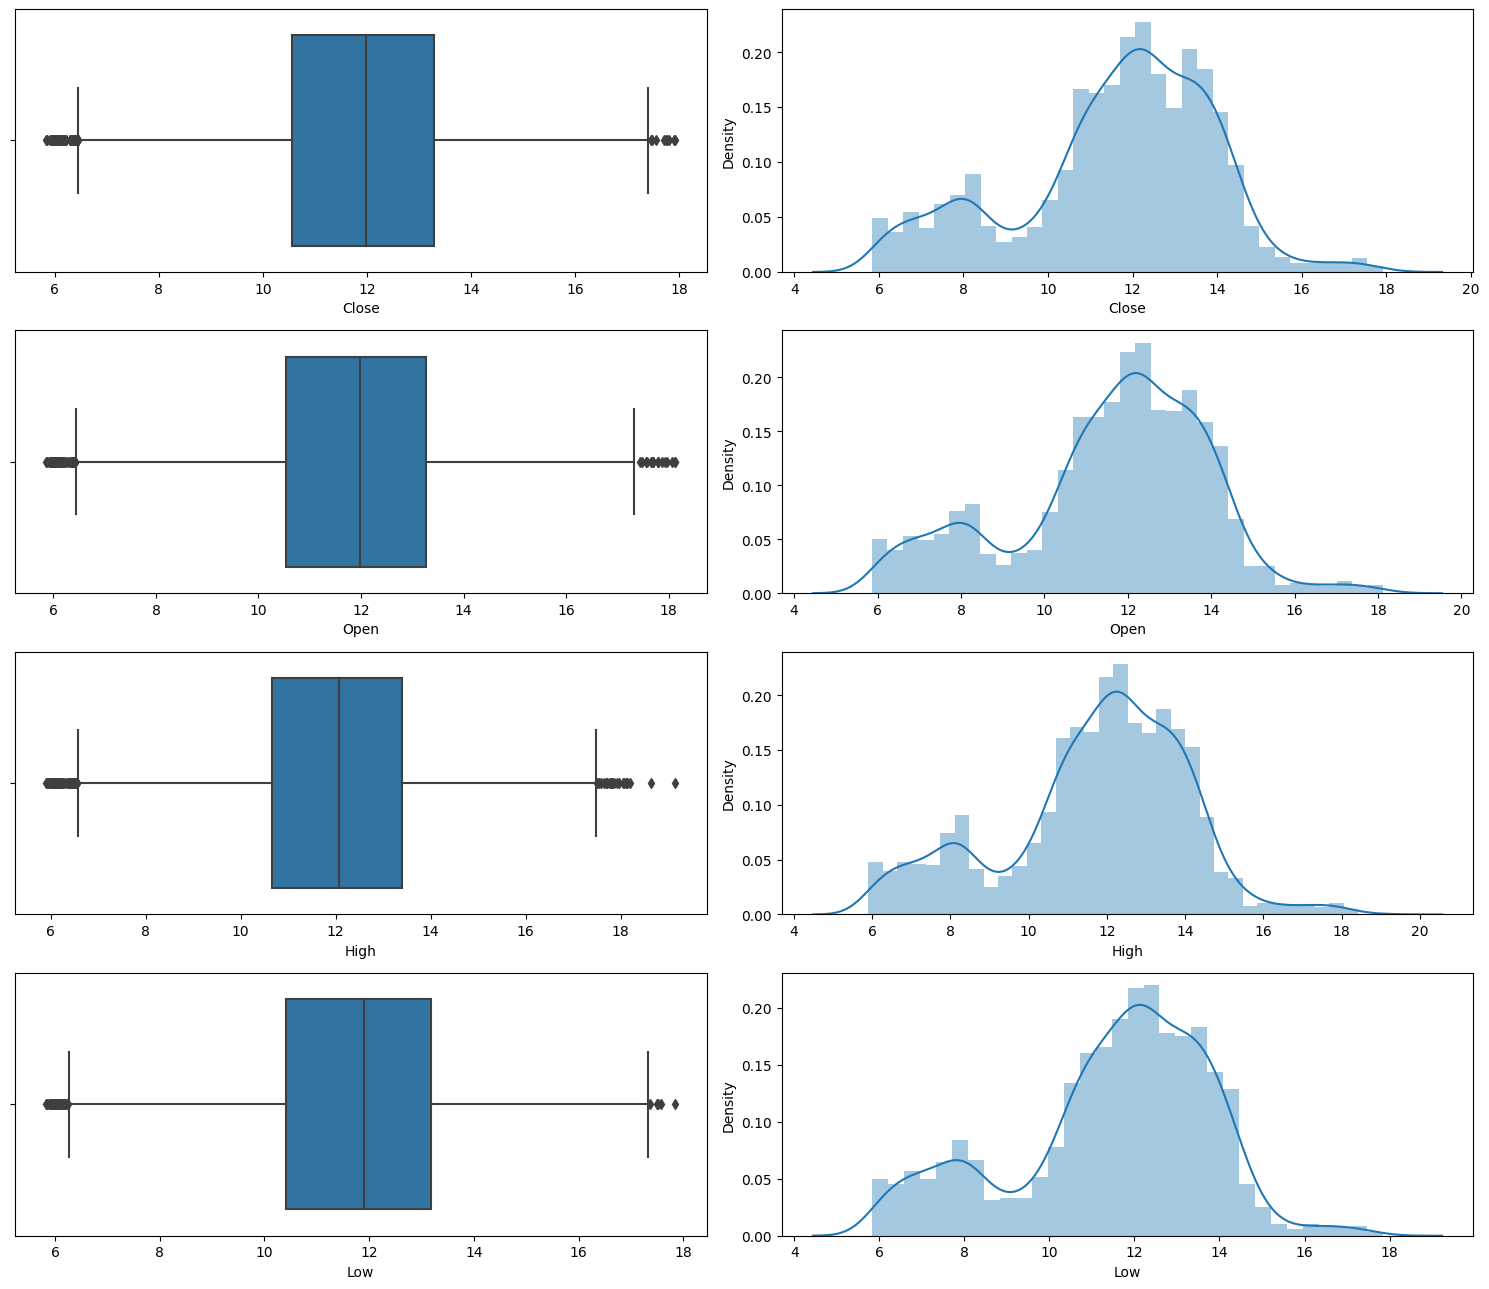

In [15]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df["Close"], ax = ax[0,0])
sns.distplot(df['Close'], ax = ax[0,1])
sns.boxplot(x= df["Open"], ax = ax[1,0])
sns.distplot(df['Open'], ax = ax[1,1])
sns.boxplot(x= df["High"], ax = ax[2,0])
sns.distplot(df['High'], ax = ax[2,1])
sns.boxplot(x= df["Low"], ax = ax[3,0])
sns.distplot(df['Low'], ax = ax[3,1])
plt.tight_layout()

**HEAT MAP**

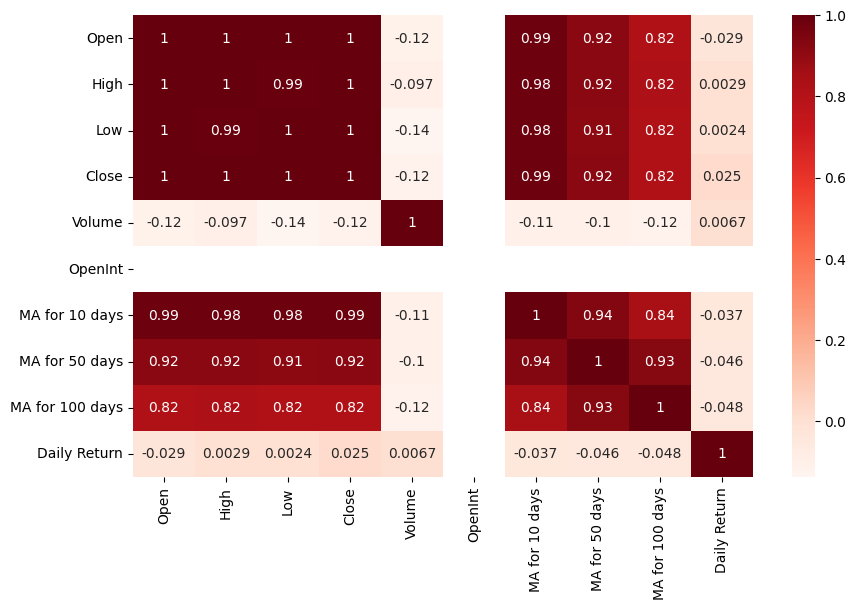

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.show()

###**TRAINING DATA**

In [17]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2470
618


In [18]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))


# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
62/62 [==============================] - 16s 81ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0638 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0455
Epoch 2/40
62/62 [==============================] - 2s 40ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0442 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0360
Epoch 3/40
62/62 [==============================] - 2s 40ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0434 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0428
Epoch 4/40
62/62 [==============================] - 2s 37ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0324
Epoch 5/40
62/62 [==============================] - 2s 38ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0369 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0326
Epoch 6/40
62/62 [==============================] - 4s 58ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0347 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0316
Epoch 7/40
62/62 [===

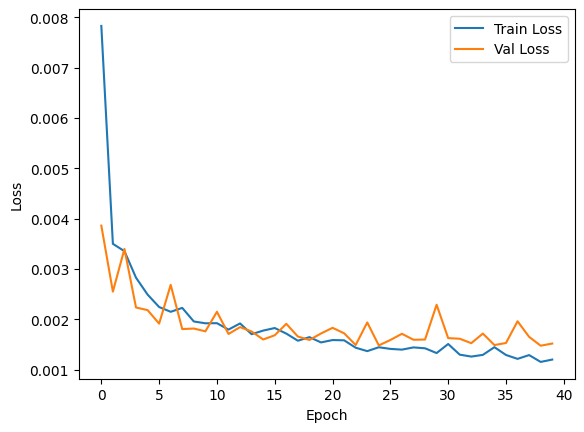

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

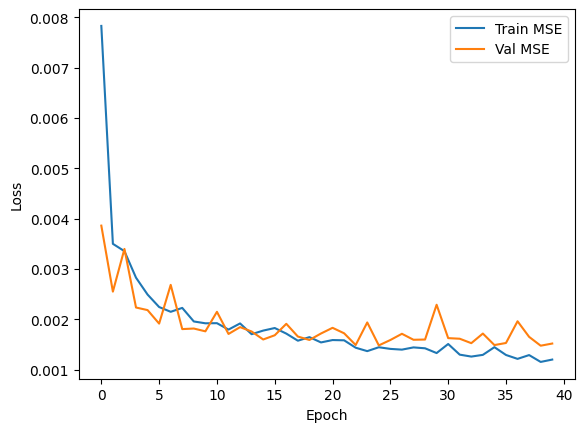

In [20]:
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

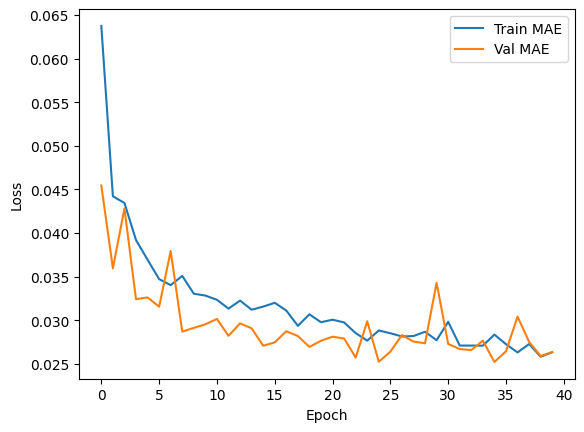

In [21]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

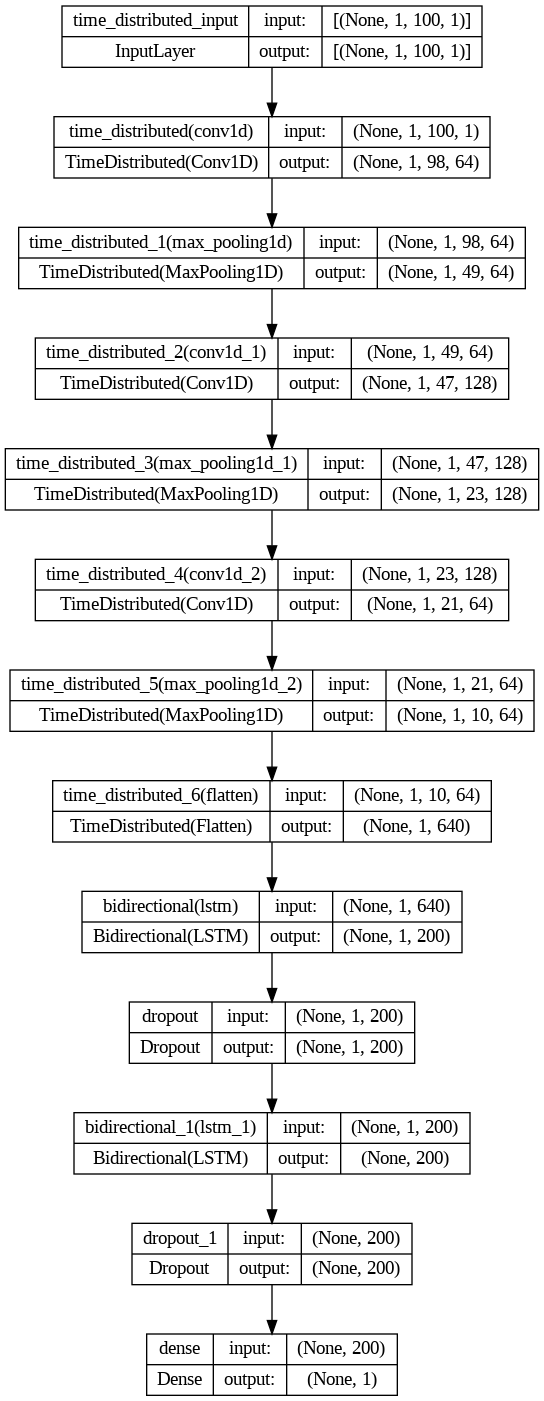

In [22]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [23]:
model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 9ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0263


[0.001522218226455152, 0.001522218226455152, 0.026335936039686203]

In [24]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error


# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)


Variance: 0.937961
R2 Score: 0.937961
Max Error: 0.530053


20/20 [==============================] - 0s 9ms/step


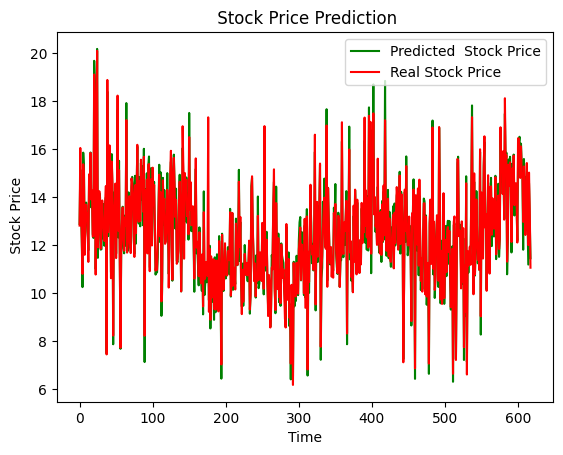

In [25]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

###**TESTING**

In [26]:
# Saving Model
model.save("model.h10")

In [27]:
# Loading model
new_model = tf.keras.models.load_model("model.h10")

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [29]:
from google.colab import files
data=files.upload()

Saving SBIN.csv to SBIN.csv


In [30]:
df2 = pd.read_csv('SBIN.csv')
df2.dropna(inplace=True)
df2.head()

df2.reset_index(drop=True, inplace=True)
df2.fillna(df.mean(), inplace=True)
df2.head()


print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))


            Date Symbol Series  Prev Close     Open     High      Low  \
0     01-06-2011   SBIN     EQ     2297.95  2308.80  2337.00  2301.00   
1     02-06-2011   SBIN     EQ     2329.20  2308.00  2349.80  2294.00   
2     03-06-2011   SBIN     EQ     2334.20  2334.70  2356.00  2301.00   
3     06-06-2011   SBIN     EQ     2312.50  2303.00  2321.90  2272.40   
4     07-06-2011   SBIN     EQ     2317.15  2313.40  2336.70  2305.10   
...          ...    ...    ...         ...      ...      ...      ...   
2867   26-Dec-22   SBIN     EQ      574.00   574.00   601.70   570.70   
2868   27-Dec-22   SBIN     EQ      597.10   600.40   603.10   593.30   
2869   28-Dec-22   SBIN     EQ      601.90   600.90   607.00   598.55   
2870   29-Dec-22   SBIN     EQ      601.05   600.00   618.00   597.15   
2871   30-Dec-22   SBIN     EQ      611.80   615.25   620.55   611.35   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0     2333.00  2329.20  2324.19   2542464  5.909180e+1

In [31]:
model.evaluate(test_X, test_Y)

18/18 [==============================] - 0s 14ms/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0742


[0.012410219758749008, 0.012410219758749008, 0.07417412102222443]

18/18 [==============================] - 0s 9ms/step


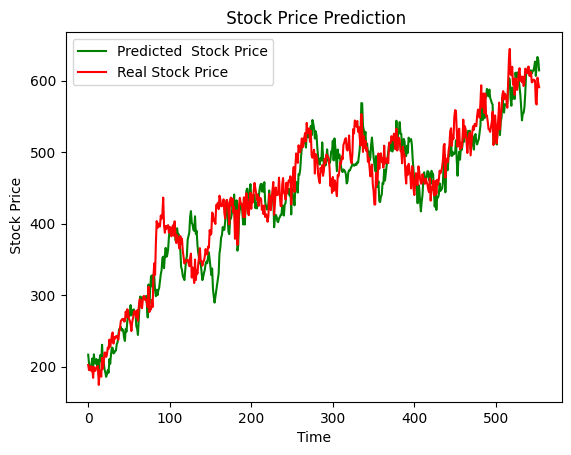

In [32]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

##**THANK YOU**